In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import datetime
from tqdm import tqdm # for progress bar
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard
import logging

In [2]:
# Remove prior tensor logs from the log file
#rm -rf ./logs/*

In [3]:
def image_reshape(xtrain, xtest):
    x_train = tf.pad(xtrain, [[0, 0], [2,2], [2,2]])/255
    x_test = tf.pad(xtest, [[0, 0], [2,2], [2,2]])/255

    x_train = tf.expand_dims(x_train, axis=3, name=None)
    x_test = tf.expand_dims(x_test, axis=3, name=None)
    
    x_train = tf.repeat(x_train, 3, axis=3)
    x_test = tf.repeat(x_test, 3, axis=3)
    
    
    return x_train, x_test

In [4]:
# Reshape image 
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train, x_test = image_reshape(x_train, x_test)

# Divide training dataset into training and validation sets
x_val = x_train[-2000:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:]
y_train = y_train[:-2000]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(58000, 32, 32, 3)
(58000,)
(10000, 32, 32, 3)
(10000,)
(2000, 32, 32, 3)
(2000,)


2023-05-11 17:22:51.902779: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 17:22:52.775117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2631 MB memory:  -> device: 0, name: NVIDIA A40, pci bus id: 0000:e3:00.0, compute capability: 8.6


In [5]:
# Define the VGG19 model
model = models.Sequential()
#model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(1000, activation='softmax'))


In [6]:
# Compile the model
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and log data
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Define the CSVLogger callback
csv_logger = tf.keras.callbacks.CSVLogger('training.log')

callbacks = [tensorboard_callback, csv_logger]

history = model.fit(x_train, y_train, epochs=40, validation_data=(x_val, y_val), batch_size=64, callbacks=callbacks)

Epoch 1/40


2023-05-11 17:22:56.775775: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2023-05-11 17:22:58.659150: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 17:22:58.660544: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 17:22:58.660601: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-05-11 17:22:58.662371: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-11 17:22:58.662516: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-05-11 17:22:59.101351: W tensorflow/core/common_runtime/bf

907/907 [==============================] - 39s 36ms/step - loss: 3.6183 - accuracy: 0.1069 - val_loss: 2.3326 - val_accuracy: 0.1000
Epoch 2/40
907/907 [==============================] - 27s 30ms/step - loss: 2.3162 - accuracy: 0.1010 - val_loss: 2.3625 - val_accuracy: 0.0950
Epoch 3/40
907/907 [==============================] - 29s 32ms/step - loss: 2.3141 - accuracy: 0.1038 - val_loss: 2.3122 - val_accuracy: 0.1070
Epoch 4/40
907/907 [==============================] - 38s 42ms/step - loss: 2.3130 - accuracy: 0.1031 - val_loss: 2.3178 - val_accuracy: 0.1045
Epoch 5/40
907/907 [==============================] - 26s 29ms/step - loss: 2.3132 - accuracy: 0.1013 - val_loss: 2.3168 - val_accuracy: 0.1045
Epoch 6/40
907/907 [==============================] - 27s 30ms/step - loss: 2.3118 - accuracy: 0.1068 - val_loss: 2.3159 - val_accuracy: 0.1045
Epoch 7/40
907/907 [==============================] - 27s 30ms/step - loss: 2.3108 - accuracy: 0.1045 - val_loss: 2.3277 - val_accuracy: 0.1065
Epo

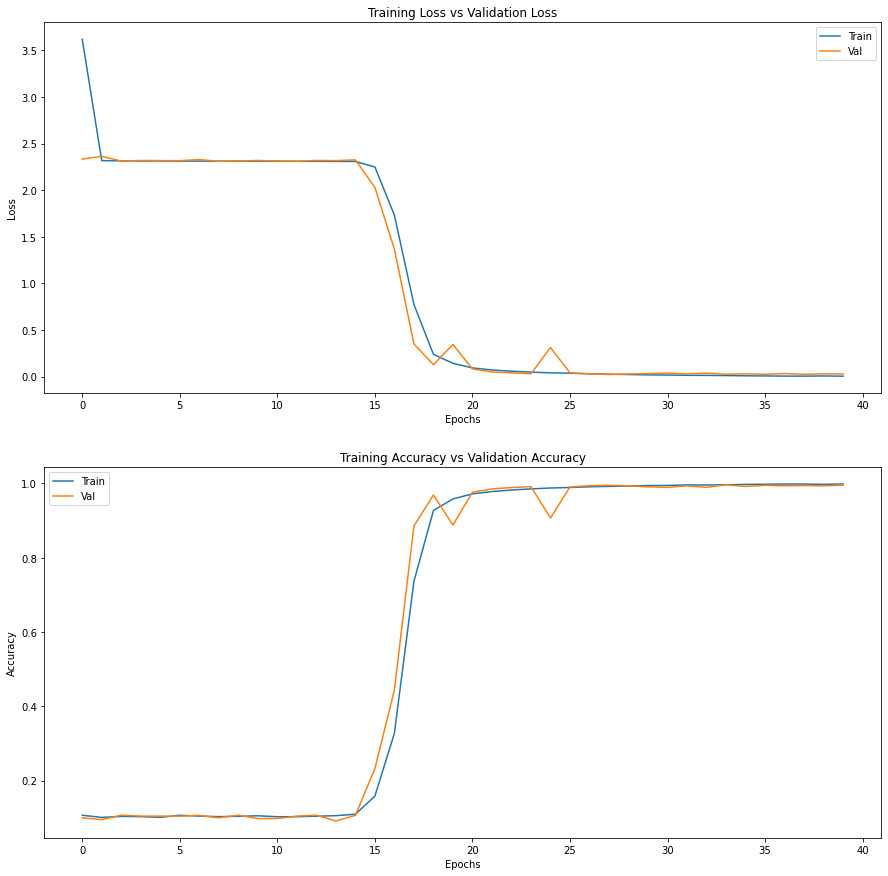

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [8]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit